### University of Virginia
### DS 5559: Big Data Analytics
### 5.11 Final Project Assignment
#### Buckley Dowdle(Bd6fr), Jae Yoon Sung(js2yp), Luke Moles(lmm8fb), Latifa Hasan(lmh3ge)

In [ ]:
import pandas as pd

df = pd.read_csv('sample_data/2017_data.csv')

In [ ]:
#number of rows
df.shape[0]

114297

In [ ]:
#number of columns
df.shape[1]

48

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114297 entries, 0 to 114296
Data columns (total 48 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ParticipantID      114297 non-null  int64  
 1   Gender             114297 non-null  int64  
 2   Age                114297 non-null  float64
 3   Race               114297 non-null  int64  
 4   Education_Level    74945 non-null   float64
 5   Household_income   109742 non-null  float64
 6   Pulse              110309 non-null  float64
 7   SysBP              89922 non-null   float64
 8   DiasBP             89922 non-null   float64
 9   Energy             111710 non-null  float64
 10  Protein            111710 non-null  float64
 11  Carbohydrates      111710 non-null  float64
 12  Total_sugar        111710 non-null  float64
 13  Fiber              111710 non-null  float64
 14  Total_fat          111710 non-null  float64
 15  Sat_fat            111710 non-null  float64
 16  Mo

In [ ]:
df.describe()

,ParticipantID,Gender,Age,Race,Education_Level,Household_income,Pulse,SysBP,DiasBP,Energy,Protein,Carbohydrates,Total_sugar,Fiber,Total_fat,Sat_fat,Monounsat_fat,Polyunsat_fat,cholesterol,Alcohol,Weight(kg),BMI,Waist_Circum,Insulin,Glucose,Avg_Drinks,4-5_Drinks,8+Drinks,12+Drinks,4-5DrinksDaily,HighBP,HighChol,VigWork,ModWork,Walk_bike,VigActivity,ModActivity,100Cigs,Smoke_Cigs,Smoke_Cigar,E_cig,Smokeless_tobacco,Diagnosis,Diagnosed_age,Prediabetes,Diabetes_risk,Fam_hist,Blood_test
count,114297.000000,114297.000000,1.142970e+05,114297.000000,74945.000000,109742.000000,110309.000000,89922.000000,8.992200e+04,1.117100e+05,1.117100e+05,1.117100e+05,1.117100e+05,1.117100e+05,1.117100e+05,1.117100e+05,1.117100e+05,1.117100e+05,1.117100e+05,1.117100e+05,112745.000000,105963.000000,102771.000000,39231.000000,40074.000000,52170.000000,2.124200e+04,2.124200e+04,7.667000e+03,67046.000000,81176.000000,81176.000000,77945.000000,77945.000000,77945.000000,77945.000000,77945.000000,77945.000000,31058.000000,77945.000000,77945.000000,77945.000000,110637.000000,11937.000000,73140.000000,75761.000000,15889.000000,75761.000000
mean,98333.933034,1.512297,3.706632e+01,3.482699,3.650077,12.009632,1.027749,122.328062,6.899735e+01,1.334833e+02,4.889177e+00,1.614666e+01,7.118949e+00,1.031554e+00,5.362680e+00,1.766739e+00,1.818106e+00,1.254319e+00,1.821219e+01,3.918217e-01,67.077733,26.897292,91.159371,14.414249,6.230169,3.759268,4.023020e+00,3.221213e+00,4.142689e+00,1.863601,1.653062,1.692606,1.765604,1.570377,1.757970,1.737507,1.575470,1.601540,2.317342,1.636923,1.816897,1.850164,1.917731,57.652509,1.889828,1.846253,10.078419,1.750861
std,2680.324611,0.499851,2.536342e+01,1.698493,1.203824,15.455936,0.164255,20.028754,1.542920e+01,1.869483e+02,9.951052e+00,2.408492e+01,1.486558e+01,2.100512e+00,9.935154e+00,3.703092e+00,3.684414e+00,2.828922e+00,5.837878e+01,5.195303e+00,32.079762,8.021994,22.256373,20.346699,1.937458,36.030715,7.493524e+00,7.226929e+00,8.670866e+00,0.430676,0.569680,0.727908,0.467177,0.514944,0.428315,0.439992,0.494275,0.489584,0.901932,0.512706,0.403126,0.365860,0.371087,86.064866,0.434032,0.520148,2.640754,1.446341
min,93703.000000,1.000000,5.400000e-79,1.000000,1.000000,1.000000,1.000000,72.000000,5.400000e-79,5.400000e-79,5.400000e-79,5.400000e-79,5.400000e-79,5.400000e-79,5.400000e-79,5.400000e-79,5.400000e-79,5.400000e-79,5.400000e-79,5.400000e-79,3.200000,12.300000,40.000000,0.710000,2.610000,1.000000,5.400000e-79,5.400000e-79,5.400000e-79,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,1.000000
25%,96001.000000,1.000000,1.300000e+01,3.000000,3.000000,6.000000,1.000000,108.000000,6.200000e+01,1.000000e+01,7.000000e-02,4.100000e-01,5.000000e-02,5.400000e-79,4.000000e-02,2.000000e-03,1.000000e-03,3.000000e-03,5.400000e-79,5.400000e-79,49.100000,21.100000,76.100000,6.290000,5.330000,1.000000,5.400000e-79,5.400000e-79,5.400000e-79,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,41.000000,2.000000,2.000000,10.000000,1.000000
50%,98353.000000,2.000000,3.600000e+01,3.000000,4.000000,9.000000,1.000000,118.000000,7.000000e+01,7.700000e+01,1.090000e+00,7.020000e+00,1.440000e+00,1.000000e-01,1.140000e+00,2.520000e-01,2.610000e-01,1.390000e-01,5.400000e-79,5.400000e-79,69.800000,26.300000,92.600000,9.880000,5.720000,2.000000,5.400000e-79,5.400000e-79,5.400000e-79,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,50.000000,2.000000,2.000000,10.000000,2.000000
75%,100645.000000,2.000000,6.000000e+01,4.000000,5.000000,14.000000,1.000000,134.000000,7.800000e+01,1.770000e+02,5.280000e+00,2.429000e+01,8.320000e+00,1.200000e+00,6.630000e+00,1.961000e+00,2.091000e+00,1.236000e+00,9.000000e+00,5.400000e-79,86.700000,31.500000,106.000000,16.190000,6.330000,3.000000,9.000000e+00,7.00

In [ ]:
#Percentage of Response variable
df.Diagnosis.value_counts()/df.shape[0]

2.0    0.839891
1.0    0.104596
3.0    0.023246
9.0    0.000245
Name: Diagnosis, dtype: float64

In [ ]:
df.Gender.value_counts()/df.shape[0]

2    0.512297
1    0.487703
Name: Gender, dtype: float64

In [ ]:
df.Race.value_counts()/df.shape[0]

3    0.359056
4    0.208361
1    0.146994
6    0.131456
2    0.088515
7    0.065619
Name: Race, dtype: float64

In [ ]:
df.Age.describe()

count    1.142970e+05
mean     3.706632e+01
std      2.536342e+01
min      5.400000e-79
25%      1.300000e+01
50%      3.600000e+01
75%      6.000000e+01
max      8.000000e+01
Name: Age, dtype: float64

In [ ]:
var_corr = df.iloc[:,1:11].corr()

Text(0.5, 1.0, '')

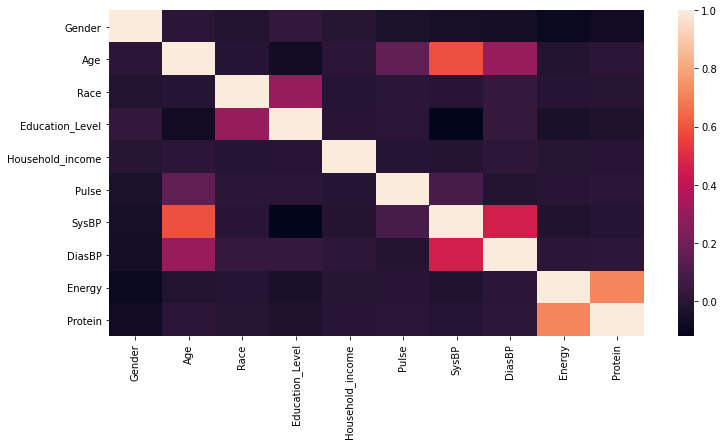

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (12,6))
sns.heatmap(var_corr)
plt.title("")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Diagnosis')

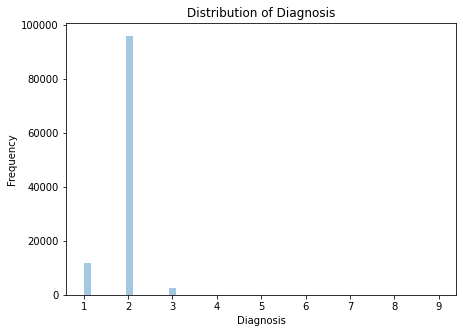

In [ ]:
plt.figure(figsize=(7,5))
sns.distplot(df['Diagnosis'], kde=False)
plt.ylabel('Frequency')
plt.xlabel('Diagnosis')
plt.title('Distribution of Diagnosis')

Text(0.5, 6.79999999999999, 'Diagnosis')

<Figure size 504x360 with 0 Axes>

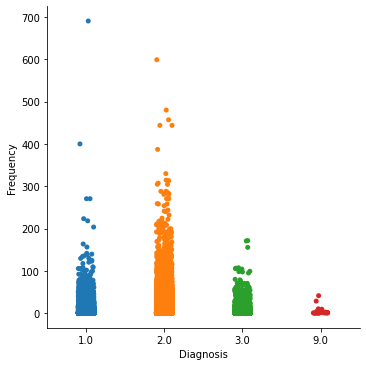

In [ ]:
plt.figure(figsize=(7,5))
sns.catplot(x='Diagnosis', y='Total_sugar', data=df)
plt.ylabel('Frequency')
plt.xlabel('Diagnosis')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Distribution of Total_sugar')

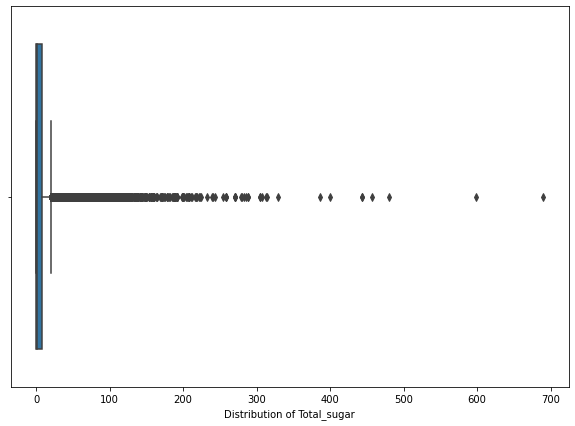

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(df['Total_sugar'])
plt.xlabel("Distribution of Total_sugar")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Distribution of Total_fat')

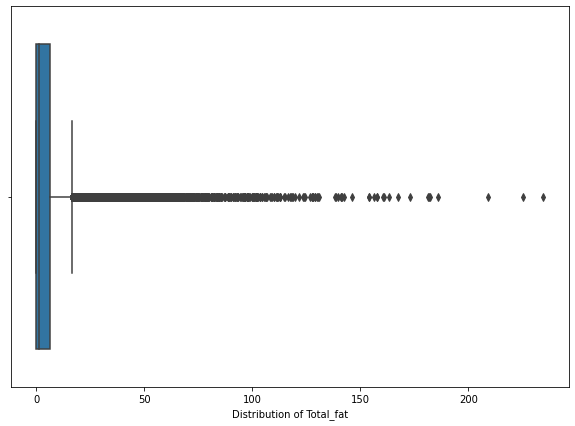

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(df['Total_fat'])
plt.xlabel("Distribution of Total_fat")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Distribution of Total_fat')

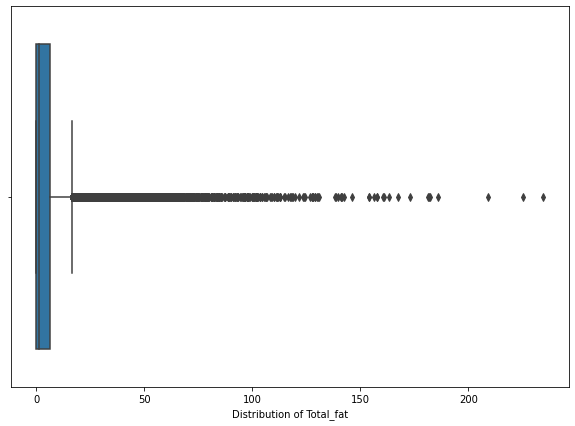

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(df['Total_fat'])
plt.xlabel("Distribution of Total_fat")